## weekly cases autoregression and variable cross-correlations

In [1]:
import pandas as pd
from datetime import datetime, date
from epiweeks import Week
import statsmodels.api as sm
import numpy as np
from statsmodels.tsa.ar_model import AutoReg, ar_select_order

In [2]:
df = pd.read_csv("dataset by week (no outliers, median-filled) .csv")

In [3]:
df['weekstart'] = pd.to_datetime(df['weekstart'])

In [4]:
df.columns

Index(['Unnamed: 0', 'epiweek', 'weekstart', 'cases', 'edvisits', 'wind',
       'precip', 'snow', 'temp', 'aqi', 'co', 'Ozone', 'pm10', 'pm25', 'no2',
       'flu', 'cough', 'cold', 'year', 'month_1', 'month_2', 'month_3',
       'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9',
       'month_10', 'month_11', 'month_12', 'top_pollutant', 'month'],
      dtype='object')

In [4]:
df = df.loc[df['weekstart']<datetime(year=2020, month=1, day=1)]

In [5]:
df = df.set_index('weekstart').asfreq(freq='W')

In [19]:
sel = ar_select_order(df['cases'].dropna(),  maxlag=53)
sel.ar_lags
res = sel.model.fit()
print(res.summary())

c:\Users\ljens\scoop\apps\python\current\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ljens\scoop\apps\python\current\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                            AutoReg Model Results                             
Dep. Variable:                  cases   No. Observations:                  768
Model:                     AutoReg(6)   Log Likelihood               -5760.060
Method:               Conditional MLE   S.D. of innovations            464.144
Date:                Tue, 14 Nov 2023   AIC                          11536.121
Time:                        17:15:21   BIC                          11573.208
Sample:                             6   HQIC                         11550.401
                                  768                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        141.1953     28.527      4.950      0.000      85.284     197.106
cases.L1       0.6064      0.036     16.848      0.000       0.536       0.677
cases.L2       0.0704      0.042      1.694      0.0

In [24]:
mod = AutoReg(df['cases'].dropna(),52)
res = mod.fit()
print(res.summary())

                            AutoReg Model Results                             
Dep. Variable:                  cases   No. Observations:                  768
Model:                    AutoReg(52)   Log Likelihood               -5355.678
Method:               Conditional MLE   S.D. of innovations            428.829
Date:                Tue, 14 Nov 2023   AIC                          10819.357
Time:                        18:56:21   BIC                          11066.335
Sample:                            52   HQIC                         10914.729
                                  768                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        184.2362     64.537      2.855      0.004      57.745     310.727
cases.L1       0.5035      0.037     13.595      0.000       0.431       0.576
cases.L2       0.0337      0.041      0.812      0.4

c:\Users\ljens\scoop\apps\python\current\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [26]:
sel = ar_select_order(pd.DataFrame(df['cases'].dropna()),  maxlag=52, seasonal=True, period=52)
sel.ar_lags
res = sel.model.fit()
print(res.summary())

c:\Users\ljens\scoop\apps\python\current\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                            AutoReg Model Results                             
Dep. Variable:                  cases   No. Observations:                  768
Model:               Seas. AutoReg(6)   Log Likelihood               -5701.646
Method:               Conditional MLE   S.D. of innovations            429.893
Date:                Tue, 14 Nov 2023   AIC                          11521.293
Time:                        19:04:12   BIC                          11794.813
Sample:                             6   HQIC                         11626.608
                                  768                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        274.9783    121.932      2.255      0.024      35.997     513.960
s(2,52)      -64.1432    162.924     -0.394      0.694    -383.467     255.181
s(3,52)     -316.1598    163.094     -1.939      0.0

c:\Users\ljens\scoop\apps\python\current\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [29]:
df.asfreq(freq='W')

,Unnamed: 0,epiweek,cases,edvisits,wind,precip,snow,temp,aqi,co,...,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,top_pollutant,month
weekstart,,,,,,,,,,,,,,,,,,,,,
2004-01-04,0.0,200401.0,599.0,53.0,11.0,0.11,1.80,17.0,41.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,PM2.5,1.0
2004-01-11,1.0,200402.0,640.0,53.0,12.0,0.07,0.72,23.0,56.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,PM2.5,1.0
2004-01-18,2.0,200403.0,399.0,53.0,11.0,0.04,0.50,15.0,41.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,PM2.5,1.0
2004-01-25,3.0,200404.0,622.0,53.0,12.0,0.10,1.23,13.0,37.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NO2,1.0
2004-02-01,4.0,200405.0,552.0,53.0,11.0,0.07,0.69,21.0,62.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,PM2.5,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-11-17,763.0,201947.0,1466.0,172.0,8.0,0.06,0.00,36.0,34.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Ozone,11.0
2019-11-24,764.0,201948.0,638.0,227.0,11.0,0.23,0.00,38.0,32.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Ozone,11.0
2019-12-01,765.0,201949.0,1722.0,248.0,9.0,0.13,0.64,33.0,26.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,PM2.5,12.0


In [30]:
dd = pd.read_csv("dataset by week (no outliers, median-filled) .csv")

In [32]:
dd.drop(columns=['Unnamed: 0'], inplace=True)

In [33]:
dd

,epiweek,weekstart,cases,edvisits,wind,precip,snow,temp,aqi,co,...,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,top_pollutant,month
0,200401,2004-01-04,599,53.0,11.0,0.11,1.80,17.0,41.0,6.0,...,0,0,0,0,0,0,0,0,PM2.5,1
1,200402,2004-01-11,640,53.0,12.0,0.07,0.72,23.0,56.0,5.0,...,0,0,0,0,0,0,0,0,PM2.5,1
2,200403,2004-01-18,399,53.0,11.0,0.04,0.50,15.0,41.0,6.0,...,0,0,0,0,0,0,0,0,PM2.5,1
3,200404,2004-01-25,622,53.0,12.0,0.10,1.23,13.0,37.0,6.0,...,0,0,0,0,0,0,0,0,NO2,1
4,200405,2004-02-01,552,53.0,11.0,0.07,0.69,21.0,62.0,10.0,...,0,0,0,0,0,0,0,0,PM2.5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,201947,2019-11-17,1466,172.0,8.0,0.06,0.00,36.0,34.0,6.0,...,0,0,0,0,0,0,1,0,Ozone,11
764,201948,2019-11-24,638,227.0,11.0,0.23,0.00,38.0,32.0,7.0,...,0,0,0,0,0,0,1,0,Ozone,11
765,201949,2019-12-01,1722,248.0,9.0,0.13,0.64,33.0,26.0,8.0,...,0,0,0,0,0,0,0,1,PM2.5,12
766,201950,2019-12-08,2121,274.0,11.0,0.09,0.32,32.0,35.0,9.0,...,0,0,0,0,0,0,0,1,PM2.5,12


In [34]:
dd.set_index('weekstart',inplace=True)

In [38]:
dd['cases']

weekstart
2004-01-04     599
2004-01-11     640
2004-01-18     399
2004-01-25     622
2004-02-01     552
              ... 
2019-11-17    1466
2019-11-24     638
2019-12-01    1722
2019-12-08    2121
2019-12-15    1638
Name: cases, Length: 768, dtype: int64

In [44]:
sel = ar_select_order(dd['cases'],  maxlag=13, glob=True, seasonal=True, period=12)
sel.ar_lags
res = sel.model.fit()
print(res.summary())

c:\Users\ljens\scoop\apps\python\current\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               AutoReg Model Results                                
Dep. Variable:                        cases   No. Observations:                  768
Model:             Restr. Seas. AutoReg(11)   Log Likelihood               -5718.214
Method:                     Conditional MLE   S.D. of innovations            461.667
Date:                      Tue, 14 Nov 2023   AIC                          11470.428
Time:                              19:19:31   BIC                          11549.127
Sample:                                  11   HQIC                         11500.739
                                        768                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        141.8878     63.492      2.235      0.025      17.445     266.331
s(2,12)       49.9374     82.371      0.606      0.544    -111.507     211.382
s(3,

c:\Users\ljens\scoop\apps\python\current\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [67]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [49]:
df = df.asfreq('W')

Figure(640x480)


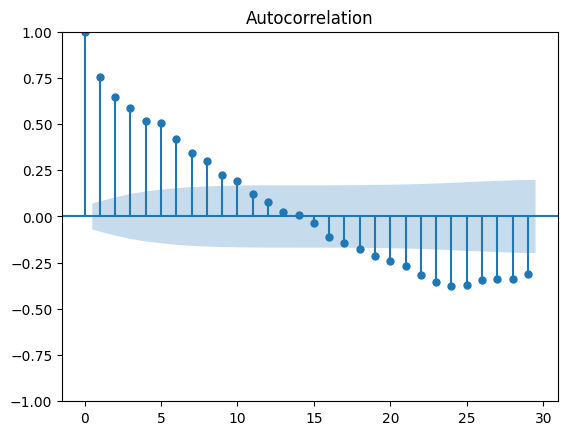

In [53]:
print(plot_acf(df.dropna()['cases']))

In [55]:
df['cases'].diff().dropna()

weekstart
2004-01-11      41.0
2004-01-18    -241.0
2004-01-25     223.0
2004-02-01     -70.0
2004-02-08     133.0
               ...  
2019-11-17    -205.0
2019-11-24    -828.0
2019-12-01    1084.0
2019-12-08     399.0
2019-12-15    -483.0
Name: cases, Length: 754, dtype: float64

Figure(640x480)


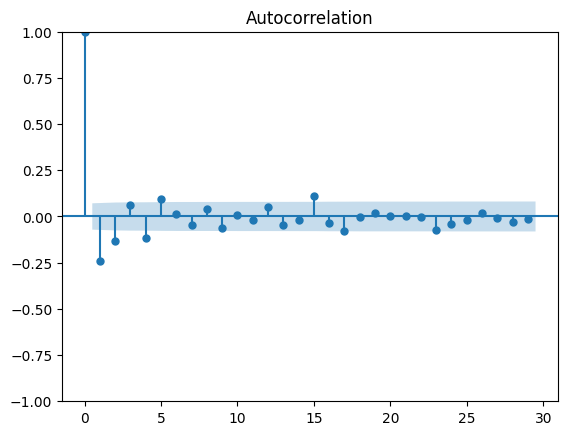

In [56]:
print(plot_acf(df['cases'].diff().dropna() ))

In [58]:
from statsmodels.tsa.stattools import adfuller

In [65]:
adfuller(df['cases'].dropna(), maxlag=52)

(-2.63582510666422,
 0.08581665948218986,
 52,
 715,
 {'1%': -3.4395289262948894,
  '5%': -2.8655907692307694,
  '10%': -2.5689271030368235},
 10790.179364155487)

In [66]:
adfuller(df['cases'].diff().dropna(), maxlag=52)

(-5.799298717912314,
 4.6715705260837375e-07,
 52,
 701,
 {'1%': -3.4397129207385357,
  '5%': -2.8656718422599923,
  '10%': -2.568970295481694},
 10594.146516091287)

Figure(640x480)


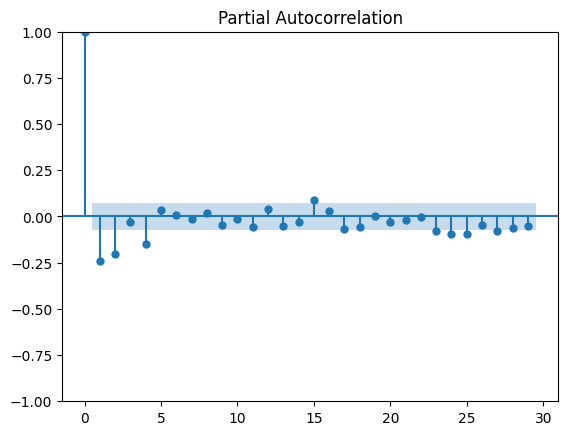

In [68]:
print(plot_pacf(df['cases'].diff().dropna()))

In [71]:
from statsmodels.tsa.arima.model import ARIMA

In [72]:
arima = ARIMA(df['cases'], order=(1,1,52))
mod = arima.fit()
print(mod.summary())

c:\Users\ljens\scoop\apps\python\current\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\ljens\scoop\apps\python\current\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                  cases   No. Observations:                  833
Model:                ARIMA(1, 1, 52)   Log Likelihood               -5695.582
Date:                Tue, 14 Nov 2023   AIC                          11499.164
Time:                        20:46:21   BIC                          11754.251
Sample:                    01-04-2004   HQIC                         11596.975
                         - 12-15-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1673      0.140     -1.193      0.233      -0.442       0.108
ma.L1         -0.3127      0.143     -2.184      0.029      -0.593      -0.032
ma.L2         -0.1849      0.090     -2.057      0.0

In [74]:
mod.predict()

weekstart
2004-01-04       0.000000
2004-01-11     558.138570
2004-01-18     598.017049
2004-01-25     475.439153
2004-02-01     578.438393
                 ...     
2019-11-17    1326.227703
2019-11-24    1306.816210
2019-12-01    1164.328925
2019-12-08    1720.122003
2019-12-15    1795.339234
Freq: W-SUN, Name: predicted_mean, Length: 833, dtype: float64

In [75]:
df_pred = df['cases']

In [78]:
df_pred = pd.DataFrame(df_pred).join(pd.DataFrame(mod.predict()))

In [7]:
import plotly.express as px

In [84]:
df_pred.reset_index().loc[df_pred.reset_index()['weekstart']>datetime(2018,12,1)]

,weekstart,cases,predicted_mean
778,2018-12-02,1148.0,1063.315657
779,2018-12-09,1260.0,1173.275598
780,2018-12-16,1189.0,1182.355589
781,2018-12-23,62.0,1175.081259
782,2018-12-30,48.0,572.494856
783,2019-01-06,1039.0,573.074553
784,2019-01-13,917.0,829.130470
785,2019-01-20,819.0,951.978000
786,2019-01-27,34.0,827.658955
787,2019-02-03,NaN,516.130178


In [87]:
px.line(df_pred.reset_index().loc[df_pred.reset_index()['weekstart']>datetime(2017,12,1)].set_index('weekstart'))

In [109]:
arima = ARIMA(df['cases'], order=(1,0,1))
mod2 = arima.fit()
print(mod2.summary())

                               SARIMAX Results                                
Dep. Variable:                  cases   No. Observations:                  833
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -5808.228
Date:                Tue, 14 Nov 2023   AIC                          11624.456
Time:                        21:21:35   BIC                          11643.356
Sample:                    01-04-2004   HQIC                         11631.703
                         - 12-15-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        840.5523    112.743      7.455      0.000     619.581    1061.524
ar.L1          0.8663      0.027     32.138      0.000       0.814       0.919
ma.L1         -0.2581      0.037     -7.031      0.0

In [110]:
df_pred = df['cases']
df_pred = pd.DataFrame(df_pred).join(pd.DataFrame(mod2.predict()))

In [111]:
px.line(df_pred.reset_index().loc[df_pred.reset_index()['weekstart']>datetime(2017,12,1)].set_index('weekstart'))

In [113]:
px.histogram(df['cases'])

In [114]:
import math

In [121]:
px.histogram(df['cases'].apply(lambda x: math.log(x+1)))

In [123]:
len(df.loc[df['cases']==0,'cases'])

38

In [125]:
len(df)

833

In [126]:
38/833

0.04561824729891957

In [139]:
df.loc[((df['month'] != 6) & (df['month'] != 7) & (df['cases'] != 8))]['cases']

weekstart
2004-01-04     599.0
2004-01-11     640.0
2004-01-18     399.0
2004-01-25     622.0
2004-02-01     552.0
               ...  
2019-11-17    1466.0
2019-11-24     638.0
2019-12-01    1722.0
2019-12-08    2121.0
2019-12-15    1638.0
Name: cases, Length: 698, dtype: float64

In [140]:
px.histogram(df.loc[((df['month'] != 6) & (df['month'] != 7) & (df['cases'] != 8))]['cases'])

In [8]:
import numpy as np
import pandas as pd
from scipy import signal
import statsmodels.tsa.stattools as smt
import matplotlib.pyplot as plt

In [42]:
def plot_ccf_sm(target, exog, unbiased=False, nlags=10):
    """Plot CCF using Statsmodels"""
    ccfs = smt.ccf(target, exog, unbiased=False)[:nlags+1]
    lags = np.arange(len(ccfs))[:nlags+1]
    _ = plt.stem(lags, ccfs, use_line_collection=True)
    _ = plt.title(f"Cross Correlation (Statsmodels): {target.name} & {exog.name}")

def crosscorr(x: pd.Series, y: pd.Series, lag: int=0) -> float:
    """ Lag-N cross correlation. 
    Shifted data (y) filled with NaNs 

    Parameters
    ----------
    lag : int, default 0
    x, y : pandas.Series objects of equal length
    Returns
    ----------
    crosscorr : float
    """
    return x.corr(y.shift(lag))


def plot_ccf_manual(target, exog, nlags=10):
    """PLot CCF using manual calculations"""
    lags = []
    ccfs = []
    for i in np.arange(0,nlags+1):
        lags.append(i)
        ccfs.append(crosscorr(target, exog, lag=i))

    _ = plt.stem(lags, ccfs, use_line_collection=True)
    _ = plt.title(f"Cross Correlation (Manual): {target.name} & {exog.name}")

In [144]:
df.columns

Index(['Unnamed: 0', 'epiweek', 'cases', 'edvisits', 'wind', 'precip', 'snow',
       'temp', 'aqi', 'co', 'Ozone', 'pm10', 'pm25', 'no2', 'flu', 'cough',
       'cold', 'year', 'month_1', 'month_2', 'month_3', 'month_4', 'month_5',
       'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11',
       'month_12', 'top_pollutant', 'month'],
      dtype='object')

In [148]:
df[['cases','edvisits']].dropna()

,cases,edvisits
weekstart,,
2004-01-04,599.0,53.0
2004-01-11,640.0,53.0
2004-01-18,399.0,53.0
2004-01-25,622.0,53.0
2004-02-01,552.0,53.0
...,...,...
2019-11-17,1466.0,172.0
2019-11-24,638.0,227.0
2019-12-01,1722.0,248.0


In [9]:
smt.ccf(df[['cases','edvisits']].dropna()['cases'], df[['cases','edvisits']].dropna()['edvisits'])[:12]

array([ 0.42907183,  0.4475773 ,  0.42205152,  0.37710647,  0.33283667,
        0.27448346,  0.24291052,  0.19954059,  0.16763562,  0.09916234,
        0.03315398, -0.03150232])

In [15]:
smt.ccf(df[['cases','flu']].dropna()['cases'], df[['cases','flu']].dropna()['flu'])[:12]

array([0.45969104, 0.49907798, 0.50583309, 0.51923483, 0.50729169,
       0.47697422, 0.4382528 , 0.40335425, 0.37425914, 0.33520994,
       0.28269222, 0.23603425])

In [16]:
smt.ccf(df[['cases','cold']].dropna()['cases'], df[['cases','cold']].dropna()['cold'])[:12]

array([0.26570174, 0.2729351 , 0.27613284, 0.29338273, 0.30184628,
       0.30295596, 0.28655951, 0.25754567, 0.24789953, 0.23832199,
       0.20215999, 0.15931738])

In [17]:
smt.ccf(df[['cases','cough']].dropna()['cases'], df[['cases','cough']].dropna()['cough'])[:12]

array([0.25515319, 0.27228436, 0.27671561, 0.27997745, 0.27537845,
       0.25721197, 0.23712861, 0.22480572, 0.20472279, 0.18442754,
       0.15669662, 0.12389118])

In [18]:
smt.ccf(df[['cases','snow']].dropna()['cases'], df[['cases','snow']].dropna()['snow'])[:12]

array([0.2958153 , 0.30279594, 0.33139476, 0.34603188, 0.36559379,
       0.37900238, 0.33326659, 0.33450864, 0.310575  , 0.23201624,
       0.21846148, 0.18356988])

In [19]:
smt.ccf(df[['cases','wind']].dropna()['cases'], df[['cases','wind']].dropna()['wind'])[:12]

array([ 0.32331756,  0.33385637,  0.34498414,  0.30113812,  0.21236343,
        0.1954483 ,  0.17794847,  0.11816109,  0.10626888,  0.05838897,
       -0.03047578, -0.00778622])

In [20]:
smt.ccf(df[['cases','precip']].dropna()['cases'], df[['cases','precip']].dropna()['precip'])[:12]

array([-0.09737959, -0.03184223, -0.03186252, -0.06026515, -0.05409254,
       -0.06835973, -0.06623367, -0.03465877, -0.06004981, -0.05522997,
       -0.04407952, -0.03284581])

In [21]:
smt.ccf(df[['cases','wind']].dropna()['wind'], df[['cases','wind']].dropna()['cases'])[:12]

array([0.32331756, 0.32606499, 0.3571599 , 0.42741795, 0.42095683,
       0.40595948, 0.40460764, 0.3462274 , 0.31391665, 0.27762772,
       0.22083596, 0.15885941])

In [22]:
def do_ccf(df, col_a, col_b, nlags=12):
    return smt.ccf(df[[col_a,col_b]].dropna()[col_b], df[[col_a,col_b]].dropna()[col_a])[:nlags]

In [23]:
do_ccf(df,'cases','wind')

array([0.32331756, 0.32606499, 0.3571599 , 0.42741795, 0.42095683,
       0.40595948, 0.40460764, 0.3462274 , 0.31391665, 0.27762772,
       0.22083596, 0.15885941])

In [24]:
df.columns

Index(['Unnamed: 0', 'epiweek', 'cases', 'edvisits', 'wind', 'precip', 'snow',
       'temp', 'aqi', 'co', 'Ozone', 'pm10', 'pm25', 'no2', 'flu', 'cough',
       'cold', 'year', 'month_1', 'month_2', 'month_3', 'month_4', 'month_5',
       'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11',
       'month_12', 'top_pollutant', 'month'],
      dtype='object')

In [27]:
for col in ['wind', 'precip', 'snow', 'temp', 'aqi', 'co', 'Ozone', 'pm10', 'pm25', 'no2', 'flu', 'cough', 'cold']:
    print(col)
    print(do_ccf(df,col,'cases'))

wind
[ 0.32331756  0.33385637  0.34498414  0.30113812  0.21236343  0.1954483
  0.17794847  0.11816109  0.10626888  0.05838897 -0.03047578 -0.00778622]
precip
[-0.09737959 -0.03184223 -0.03186252 -0.06026515 -0.05409254 -0.06835973
 -0.06623367 -0.03465877 -0.06004981 -0.05522997 -0.04407952 -0.03284581]
snow
[0.2958153  0.30279594 0.33139476 0.34603188 0.36559379 0.37900238
 0.33326659 0.33450864 0.310575   0.23201624 0.21846148 0.18356988]
temp
[-0.37593838 -0.37197484 -0.35638527 -0.34950695 -0.32468047 -0.29802311
 -0.26580352 -0.22346417 -0.18609414 -0.143474   -0.0886187  -0.04176708]
aqi
[-0.31146704 -0.32211517 -0.36064253 -0.3498659  -0.36296274 -0.36449237
 -0.37471403 -0.36852011 -0.33899322 -0.32364846 -0.26664365 -0.24761464]
co
[0.08512081 0.11287272 0.10481442 0.09512841 0.14637083 0.11903248
 0.0867662  0.08989819 0.07976289 0.09627868 0.10996072 0.08724415]
Ozone
[-0.45273525 -0.46567921 -0.4782721  -0.48490958 -0.4951214  -0.49538541
 -0.4800735  -0.47018793 -0.4508614

In [28]:
corr(df[['cases','Ozone']].dropna()['cases'],df[['cases','Ozone']].dropna()['Ozone'].diff(5))

NameError: name 'corr' is not defined

In [34]:
df[['cases','Ozone']].dropna()['cases'].corr(df[['cases','Ozone']].dropna()['Ozone'].diff(4))

0.04412070182213117

In [35]:
df[['cases','Ozone']].dropna()['Ozone'].diff(4).corr(df[['cases','Ozone']].dropna()['cases'])

0.04412070182213117

In [36]:
df[['cases','Ozone']].dropna()['cases']

weekstart
2004-01-04     599.0
2004-01-11     640.0
2004-01-18     399.0
2004-01-25     622.0
2004-02-01     552.0
               ...  
2019-11-17    1466.0
2019-11-24     638.0
2019-12-01    1722.0
2019-12-08    2121.0
2019-12-15    1638.0
Name: cases, Length: 768, dtype: float64

In [37]:
df[['cases','Ozone']].dropna()['Ozone'].diff(4)

weekstart
2004-01-04     NaN
2004-01-11     NaN
2004-01-18     NaN
2004-01-25     NaN
2004-02-01     0.0
              ... 
2019-11-17   -11.0
2019-11-24    -4.0
2019-12-01     0.0
2019-12-08    -8.0
2019-12-15   -11.0
Name: Ozone, Length: 768, dtype: float64

In [39]:
smt.ccf(df[['cases','Ozone']].dropna()['cases'],df[['cases','Ozone']].dropna()['Ozone'])

array([-4.52735246e-01, -4.65679208e-01, -4.78272105e-01, -4.84909577e-01,
       -4.95121404e-01, -4.95385413e-01, -4.80073498e-01, -4.70187933e-01,
       -4.50861404e-01, -4.24239998e-01, -3.82393656e-01, -3.38660296e-01,
       -3.02750007e-01, -2.68138724e-01, -2.34667158e-01, -1.55831685e-01,
       -1.03120355e-01, -5.76543331e-02,  1.93094427e-02,  7.85590860e-02,
        1.59366985e-01,  2.15201410e-01,  2.71716542e-01,  3.31931793e-01,
        3.81093383e-01,  4.07157729e-01,  4.42918570e-01,  4.74428735e-01,
        4.61219545e-01,  4.60059723e-01,  4.63815169e-01,  4.34896537e-01,
        4.42851769e-01,  4.34973586e-01,  4.08378206e-01,  3.69267487e-01,
        3.34445149e-01,  3.07729402e-01,  2.82477709e-01,  2.44373456e-01,
        2.06415166e-01,  1.50836369e-01,  8.55523959e-02,  1.73920853e-02,
       -2.97531444e-02, -1.14214965e-01, -1.74084924e-01, -2.10875703e-01,
       -2.82675582e-01, -3.32916927e-01, -3.74175323e-01, -4.01661125e-01,
       -4.25237527e-01, -

In [40]:
sm.tsa.api.ccf()

AttributeError: module 'statsmodels.tsa.api' has no attribute 'api'

C:\Users\ljens\AppData\Local\Temp\ipykernel_800\665819421.py:31: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  _ = plt.stem(lags, ccfs, use_line_collection=True)


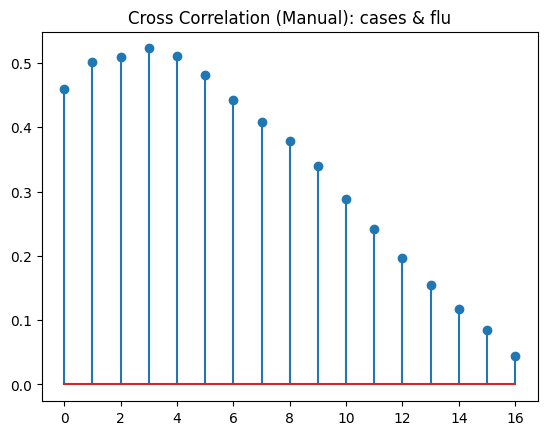

In [45]:
plot_ccf_manual(df[['cases','flu']].dropna()['cases'], df[['cases','flu']].dropna()['flu'], nlags=16)

C:\Users\ljens\AppData\Local\Temp\ipykernel_800\665819421.py:31: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  _ = plt.stem(lags, ccfs, use_line_collection=True)


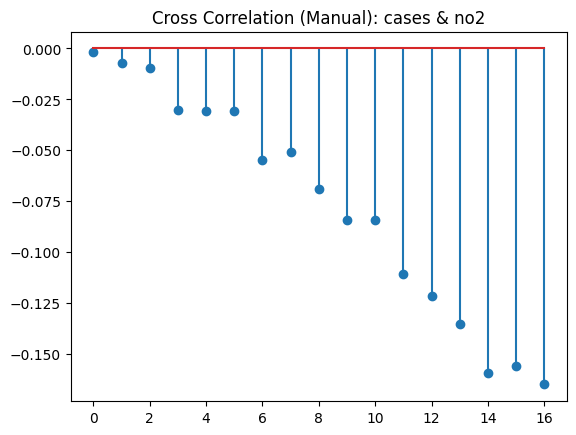

In [46]:
plot_ccf_manual(df[['cases','no2']].dropna()['cases'], df[['cases','no2']].dropna()['no2'], nlags=16)

C:\Users\ljens\AppData\Local\Temp\ipykernel_800\665819421.py:31: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  _ = plt.stem(lags, ccfs, use_line_collection=True)


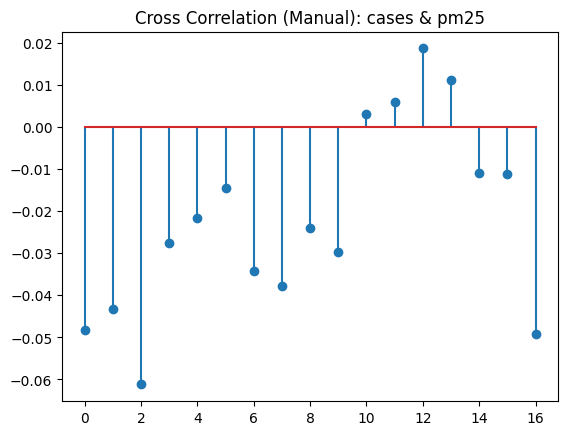

In [47]:
plot_ccf_manual(df[['cases','pm25']].dropna()['cases'], df[['cases','pm25']].dropna()['pm25'], nlags=16)

C:\Users\ljens\AppData\Local\Temp\ipykernel_800\665819421.py:31: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  _ = plt.stem(lags, ccfs, use_line_collection=True)


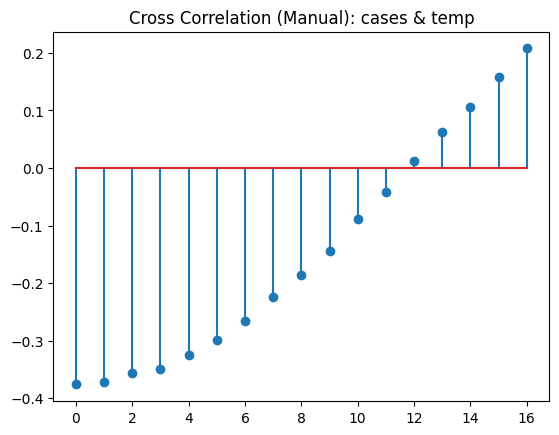

In [48]:
plot_ccf_manual(df[['cases','temp']].dropna()['cases'], df[['cases','temp']].dropna()['temp'], nlags=16)

C:\Users\ljens\AppData\Local\Temp\ipykernel_800\665819421.py:31: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  _ = plt.stem(lags, ccfs, use_line_collection=True)


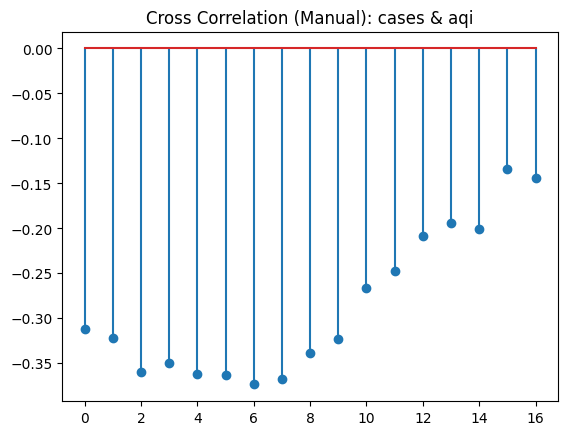

In [49]:
plot_ccf_manual(df[['cases','aqi']].dropna()['cases'], df[['cases','aqi']].dropna()['aqi'], nlags=16)

C:\Users\ljens\AppData\Local\Temp\ipykernel_800\665819421.py:31: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  _ = plt.stem(lags, ccfs, use_line_collection=True)


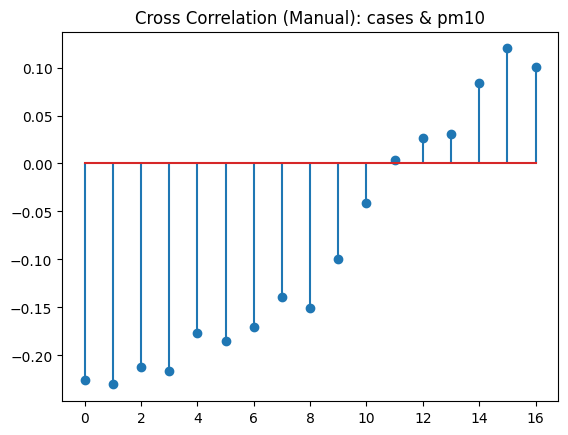

In [50]:
plot_ccf_manual(df[['cases','pm10']].dropna()['cases'], df[['cases','pm10']].dropna()['pm10'], nlags=16)

C:\Users\ljens\AppData\Local\Temp\ipykernel_800\665819421.py:31: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  _ = plt.stem(lags, ccfs, use_line_collection=True)


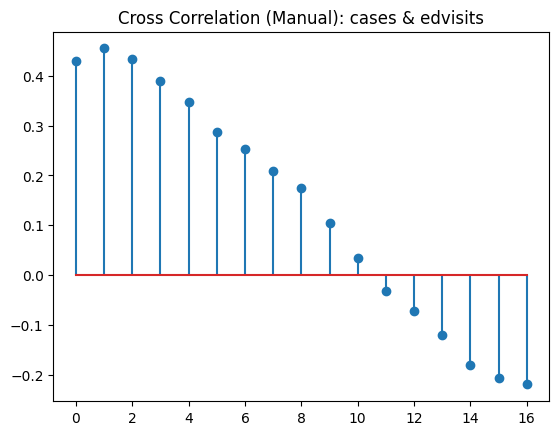

In [51]:
plot_ccf_manual(df[['cases','edvisits']].dropna()['cases'], df[['cases','edvisits']].dropna()['edvisits'], nlags=16)